# 2do Examen


**Nombre:** Ibarra Calderon Luis Alberto  
**Dataset:** Obesity Risk Dataset  
**Técnica aplicada:** K-Means Clustering

## Introducción

El dataset `features_v1.txt` no cuenta con una etiqueta explícita que indique si un paciente es obeso o no. Por lo tanto, se aplicó un algoritmo de aprendizaje no supervisado, específicamente **K-Means Clustering**, con el objetivo de **generar automáticamente etiquetas (labels)** que permitan clasificar los datos en grupos según su similitud.

Se trabajó con los atributos más relevantes para la obesidad y el riesgo metabólico: glucosa, edad, peso y número de diagnósticos.

---


link del dataset: https://www.kaggle.com/datasets/juniorbertrand/obesity-risk-dataset

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de datos

In [4]:
import pandas as pd

RANDOM_STATE = 42

#df = pd.read_csv('creditcard.csv')
#df = pd.read_csv('features_v1.txt')

df= pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial I/Segundo Parcial/features_v1.txt', delimiter=',')

#df.drop('Time', axis=1, inplace=True)
#df.drop('class', axis=1, inplace=True)
df= df.drop(['Unnamed: 0', 'BMI'], axis=1)

#df_sample = df.sample(n=50000, random_state=RANDOM_STATE)

# Guardar las features en X (todas las columnas restantes)
X = df.copy()

# Verificar dimensiones
print("\nDimensiones de X:", X.shape)

print("Primeras 5 filas del dataset:")
print(df.head())


Dimensiones de X: (22869, 16)
Primeras 5 filas del dataset:
   Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
0       0                               1     0     2      0    0     3   
1       0                               1     0     2      1    1     2   
2       1                               1     0     2      0    0     1   
3       1                               0     0     2      0    0     1   
4       1                               0     0     2      0    0     2   

   MTRANS       Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  
0       3  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5  
1       3  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0  
2       3  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5  
3       4  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0  
4       3  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0  


# Metodo del codo

Para elegir el valor más adecuado de `k` en el algoritmo K-Means, se utilizó el **método del codo**. Este método grafica la inercia (la suma de las distancias cuadradas de los puntos al centroide de su cluster) para diferentes valores de `k`.

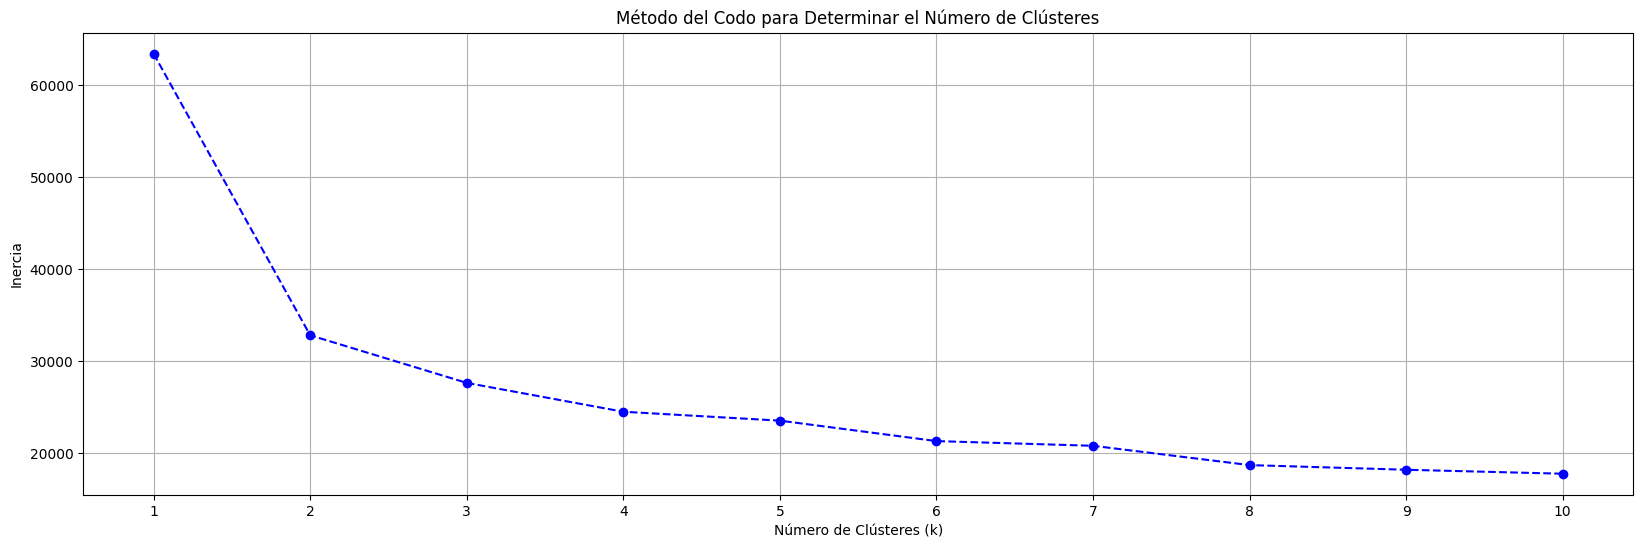

In [5]:
# Rango de valores de k para calcular la inercia
k_values = range(1, 11)  # Puedes cambiar el rango si necesitas más valores de k

# Almacenar la inercia para cada valor de k
inertia = []

# Realizar el cálculo de KMeans para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Ajuste el modelo con tus datos
    inertia.append(kmeans.inertia_)  # Guarda la inercia para el valor de k

# Graficar la inercia en función de k
plt.figure(figsize=(20, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número de Clústeres')
plt.xticks(k_values)
plt.grid(True)
plt.show()

En la gráfica, se observa que a partir de cierto punto la reducción de la inercia se vuelve menos significativa, formando un "codo". Este punto indica un buen valor para `k`, ya que es el equilibrio entre precisión y complejidad.

En nuestro caso, el **codo se forma en `k=2`**, lo cual justifica que se utilice ese valor para aplicar el modelo.

# Metodo silhouette_score

Para validar y confirmar la elección del número óptimo de clusters, se utilizó el **Silhouette Score**, que mide qué tan bien separados y compactos están los clusters.

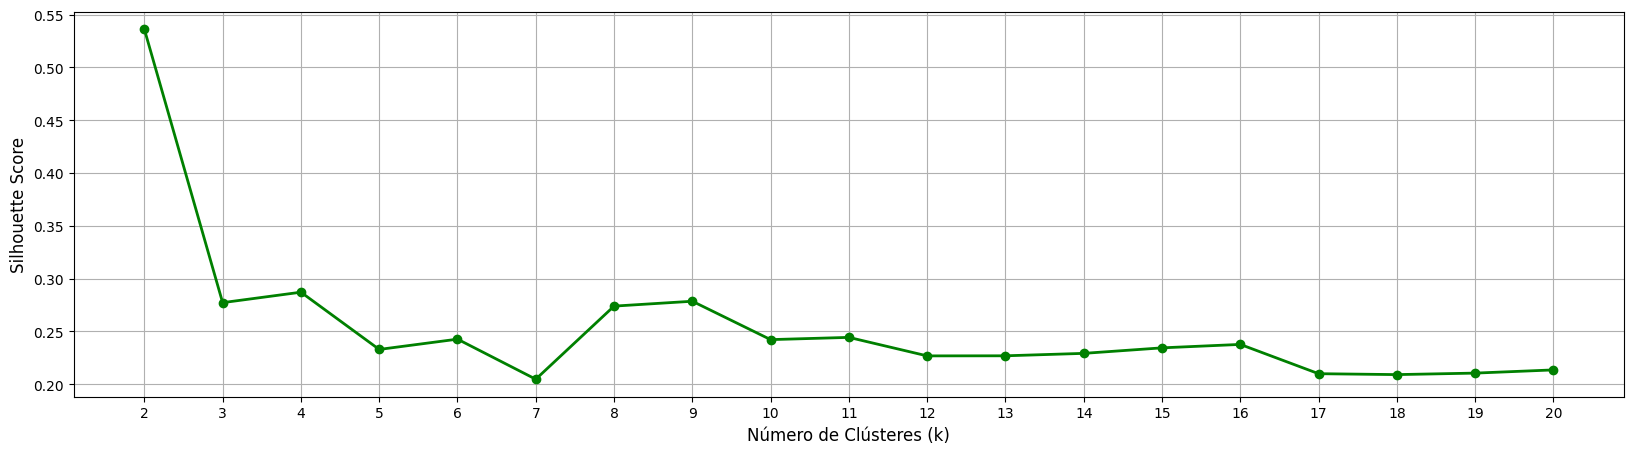

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Entrenar modelos KMeans para valores de k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 21)]

# Calcular Silhouette Score para cada modelo
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

# Graficar Silhouette Scores
plt.figure(figsize=(20, 5))
plt.plot(range(2, 21), silhouette_scores, "go-", linewidth=2)
plt.xlabel("Número de Clústeres (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples
k_optimo = np.argmax(silhouette_scores) + 2
print(f'Número óptimo de clusters (según Silhouette Score): {k_optimo}')

# Calcular para tu modelo K-Means
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score para k={k_optimo}: {score:.3f}")

Número óptimo de clusters (según Silhouette Score): 2
Silhouette Score para k=2: 0.242


In [8]:
def visualizar_silhouettes(X):
    ks = range(2, 16)
    n_rows = 5
    n_cols = 3
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 25))
    axs = axs.flatten()

    silhouette_scores = []

    for idx, k in enumerate(ks):
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

        silhouette_coeffs = silhouette_samples(X, labels)
        padding = len(X) // 30
        pos = padding
        ticks = []

        ax = axs[idx]

        for i in range(k):
            coeffs = silhouette_coeffs[labels == i]
            coeffs.sort()
            color = mpl.cm.Spectral(i / k)
            ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        ax.yaxis.set_major_locator(FixedLocator(ticks))
        ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
        ax.axvline(x=score, color="red", linestyle="--")
        ax.set_title(f"k = {k} | Silhouette Avg = {score:.2f}")
        ax.set_xlim(-0.1, 1)
        ax.set_ylim(0, pos)

    # Eliminar subplots vacíos (si sobran)
    for j in range(len(ks), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle("Visualización de Silhouette por Clusters (k=2 a k=25)", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

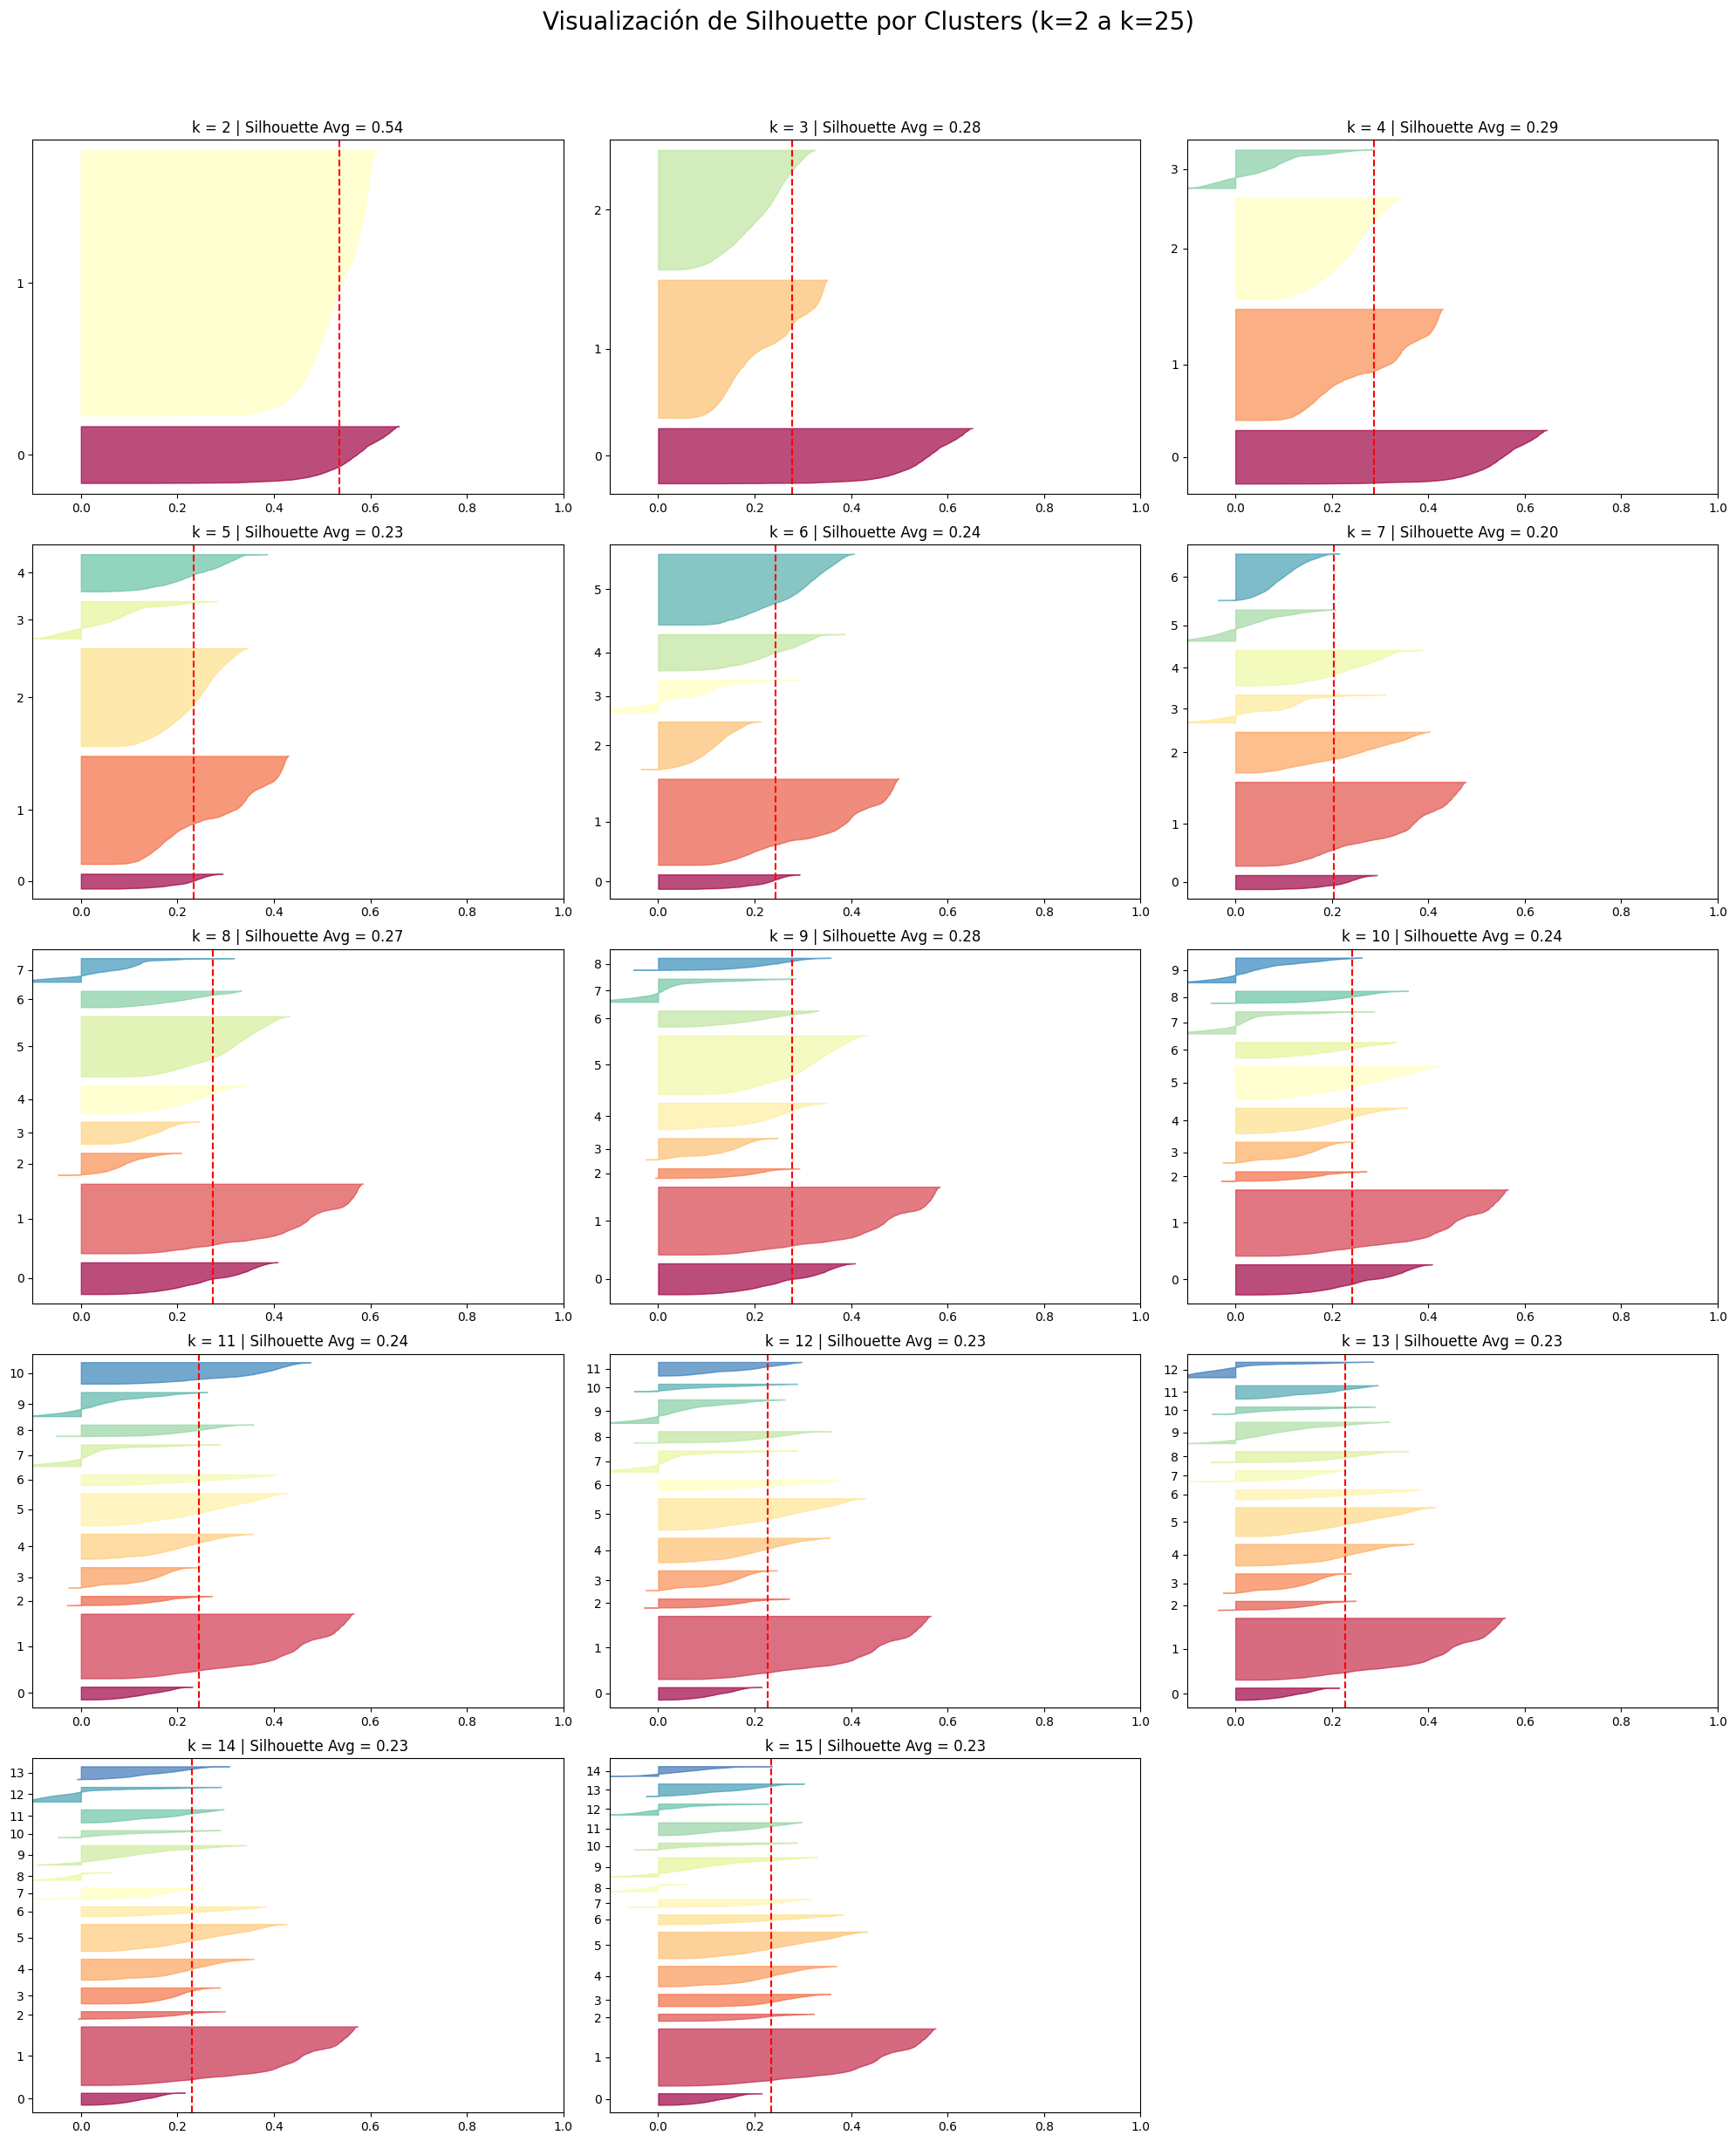

In [9]:
visualizar_silhouettes(X)

Se entrena el modelo K-Means con el valor óptimo de clusters (`k_optimo`) obtenido previamente mediante el método del codo y el Silhouette Score.

In [10]:
kmeans = KMeans(n_clusters=k_optimo, random_state=RANDOM_STATE)
labels = kmeans.fit_predict(X)
X_digits_dist = kmeans.fit_transform(X)  # Distancias a los centroides
labels = kmeans.fit_predict(X)  # etiquetas de los grupos
centroids = kmeans.cluster_centers_   # coordenadas de los centroides
print("Dimensiones de X después de la preparación:", X.shape)

Dimensiones de X después de la preparación: (22869, 16)


### Selección de puntos representativos de cada cluster

Para cada cluster, se identifica el punto del dataset que está más cerca del centroide correspondiente. Esto se logra usando `np.argmin` sobre las distancias calculadas (`X_digits_dist`), que devuelve el índice del punto con menor distancia a cada centroide.

Estos puntos representativos son útiles para interpretar y entender las características típicas de cada cluster, ya que representan un ejemplo "central" dentro de cada grupo.

In [11]:
idxs = np.argmin(X_digits_dist, axis=0)
#print("Índices de los puntos más cercanos a los centroides:", idxs)
# Representativos
X_representative_digits = X.loc[idxs]

# Mostrar resultados
print("\nPuntos representativos de cada cluster:")
print(X_representative_digits)



Puntos representativos de cada cluster:
       Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
11047       1                               1     1     2      0    0     2   
1250        0                               1     1     2      0    0     2   

       MTRANS       Age    Height    Weight      FCVC       NCP      CH2O  \
11047       0  0.424562  0.512932  0.330491  0.560955  0.548619  0.458406   
1250        3  0.085106  0.444591  0.380841  0.748228  0.666667  0.425172   

            FAF       TUE  
11047  0.300698  0.000000  
1250   0.355367  0.366133  


### Asignación manual de etiquetas a los clusters

Se asignan etiquetas de clase a cada cluster representativo basándonos en el conocimiento previo o en la interpretación de los datos:

- `0` representa "no obesidad"
- `1` representa "obesidad"

Esta asignación permite usar los clusters generados con KMeans como si fueran etiquetas supervisadas para continuar con modelos que requieren etiquetas.




In [12]:
# 0 -> no obesidad
# 1 -> obesidad
y_representative_digits = [1,0]

print("Clases de los representativos:", y_representative_digits)

Clases de los representativos: [1, 0]


### Propagación de etiquetas a todos los puntos del dataset

Se crea un arreglo `y_train_propagated` inicializado con ceros para almacenar las etiquetas asignadas a cada muestra.

Luego, para cada cluster generado por KMeans, se identifica qué puntos pertenecen a ese cluster (`mask`), y se les asigna la etiqueta representativa correspondiente (`y_representative_digits[cluster_id]`).

De esta manera, todas las muestras del dataset quedan etiquetadas según el cluster al que pertenecen, permitiendo tratar los datos con un enfoque supervisado en etapas posteriores.


In [13]:
# Versión mejorada de propagación de etiquetas
y_train_propagated = np.zeros(len(X), dtype=np.int64)  # Inicializar con tipo específico

for cluster_id in range(k_optimo):
    # Asignar la etiqueta representativa a todos los puntos del cluster
    mask = (kmeans.labels_ == cluster_id)
    y_train_propagated[mask] = y_representative_digits[cluster_id]

### División del dataset en conjuntos de entrenamiento y prueba

Se utiliza la función `train_test_split` para separar los datos en dos subconjuntos:  
- **Entrenamiento (80%)**: para ajustar el modelo.  
- **Prueba (20%)**: para evaluar el desempeño del modelo.



In [14]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (80%) y prueba (20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y_train_propagated, test_size=0.2, random_state=42, stratify=y_train_propagated
)

print("Tamaño del conjunto de entrenamiento:", len(X_train_split))
print("Tamaño del conjunto de prueba:", len(X_test_split))

Tamaño del conjunto de entrenamiento: 18295
Tamaño del conjunto de prueba: 4574


### Entrenamiento y evaluación de un modelo de regresión logística

Se crea un modelo de regresión logística configurado para clasificación multiclase usando el esquema "one-vs-rest" (`multi_class="ovr"`), con el optimizador `lbfgs` y un máximo de 5000 iteraciones para asegurar convergencia.

- El modelo se entrena usando el conjunto de entrenamiento (`X_train_split`, `y_train_split`), que contiene las características y las etiquetas propagadas obtenidas por clustering.
- Luego, se evalúa la precisión del modelo en el conjunto de prueba (`X_test_split`, `y_test_split`), calculando el porcentaje de etiquetas correctamente predichas.




In [15]:
from sklearn.linear_model import LogisticRegression
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos con los datos propagados (80% del total)
%time log_reg3.fit(X_train_split, y_train_split)

# Evaluamos con el 20% restante
score = log_reg3.score(X_test_split, y_test_split)
print("Precisión con etiquetas propagadas:", score)

CPU times: user 66.5 ms, sys: 939 µs, total: 67.4 ms
Wall time: 52.6 ms
Precisión con etiquetas propagadas: 0.9997813729777001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
